In [15]:
import cv2
import os
import torch
from ultralytics import YOLOv10

In [16]:
model_path='yolov10x.pt'

In [17]:
model = YOLOv10(model_path)

In [18]:
class_confidence_thresholds = {
    "auto": 0.5,   # Threshold for class 0
    "person": 0.5,   # Threshold for class 1
    "bicycle": 0.5,   # Threshold for class 2
    "car": 0.6,   # Threshold for class 3
    "motorbike": 0.6,   # Threshold for class 4
    "bus": 0.4,   # Threshold for class 5
    "truck": 0.3,   # Threshold for class 6
    "trafficlight": 0.15,   # Threshold for class 7
    "stopsign": 0.3,   # Threshold for class 8
    "cat": 0.4,   # Threshold for class 9
    "dog": 0.4,  # Threshold for class 10
    "cow": 0.4   # Threshold for class 11
}


In [20]:
results = model(source='/home/achintya-trn0175/Desktop/testfolder/24_03_05_130126-day-benchmark-f11-elp-3mm-y81i-75_0.png', conf=0.2)



image 1/1 /home/achintya-trn0175/Desktop/testfolder/24_03_05_130126-day-benchmark-f11-elp-3mm-y81i-75_0.png: 384x640 8 2s, 2 7s, 3 9s, 51.1ms
Speed: 1.1ms preprocess, 51.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


In [21]:
results= results[0].boxes

In [22]:
print(results)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 7., 2., 7., 9., 2., 2., 2., 2., 9., 9.], device='cuda:0')
conf: tensor([0.9611, 0.9378, 0.8936, 0.8439, 0.8399, 0.7422, 0.6994, 0.5746, 0.5617, 0.5160, 0.5008, 0.3832, 0.2601], device='cuda:0')
data: tensor([[9.7593e+02, 3.5255e+02, 1.2795e+03, 7.1026e+02, 9.6113e-01, 2.0000e+00],
        [9.8735e+02, 2.8971e+02, 1.1850e+03, 4.0266e+02, 9.3785e-01, 2.0000e+00],
        [9.1756e+02, 2.7600e+02, 1.0104e+03, 3.4277e+02, 8.9361e-01, 2.0000e+00],
        [6.4087e+02, 2.5060e+02, 8.9924e+02, 5.6169e+02, 8.4387e-01, 7.0000e+00],
        [8.7347e+02, 2.7881e+02, 9.4358e+02, 4.0594e+02, 8.3990e-01, 2.0000e+00],
        [5.0230e+02, 2.0754e+02, 6.5190e+02, 3.8048e+02, 7.4217e-01, 7.0000e+00],
        [5.2828e+02, 1.0213e+02, 5.3986e+02, 1.3386e+02, 6.9939e-01, 9.0000e+00],
        [2.5532e+02, 2.6189e+02, 3.1459e+02, 2.7860e+02, 5.7460e-01, 2.0000e+00],
        [1.1670e+03, 3.1309e+02, 1.2797e+03, 3.7940e+02, 5.61

In [23]:
# Access class indices and confidence scores
class_indices = results.cls.tolist()
confidence_scores = results.conf.tolist()

In [24]:
# Access bounding box coordinates
xyxy_boxes = results.xyxy.tolist()  # List of [xmin, ymin, xmax, ymax]
xywh_boxes = results.xywh.tolist()  # List of [x, y, width, height]

In [25]:
import yaml

#custom trained
# Load class names from YAML
with open('classes_custom.yaml', 'r') as f:
    class_names = yaml.safe_load(f)

In [26]:
print(class_names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [27]:
# Initialize filtered detections list
filtered_detections = []

# Iterate through detections
for i in range(len(results.cls)):
    class_index = int(results.cls[i])
    if class_index in class_names:
        class_name = class_names[class_index]
        confidence = float(results.conf[i])
        bbox = results.xyxy[i].tolist()  # Assuming xyxy format is used

        # Check if the confidence meets the threshold for the class
        if confidence > class_confidence_thresholds.get(class_name, 0.2):
            filtered_detections.append({
                'class': class_name,
                'confidence': confidence,
                'bbox': bbox
            })

In [28]:
print(filtered_detections)

[{'class': 'car', 'confidence': 0.9611297845840454, 'bbox': [975.9304809570312, 352.5473327636719, 1279.508056640625, 710.261962890625]}, {'class': 'car', 'confidence': 0.937847912311554, 'bbox': [987.348388671875, 289.7060852050781, 1185.04150390625, 402.6634826660156]}, {'class': 'car', 'confidence': 0.8936127424240112, 'bbox': [917.5558471679688, 276.001708984375, 1010.3623657226562, 342.7734375]}, {'class': 'truck', 'confidence': 0.8438677787780762, 'bbox': [640.8654174804688, 250.59564208984375, 899.2352905273438, 561.6867065429688]}, {'class': 'car', 'confidence': 0.8399022817611694, 'bbox': [873.4688720703125, 278.80908203125, 943.5806884765625, 405.9371337890625]}, {'class': 'truck', 'confidence': 0.7421659231185913, 'bbox': [502.2973937988281, 207.54428100585938, 651.902099609375, 380.4770202636719]}, {'class': 'traffic light', 'confidence': 0.6993857622146606, 'bbox': [528.2816162109375, 102.12955474853516, 539.8587646484375, 133.85861206054688]}, {'class': 'traffic light', '

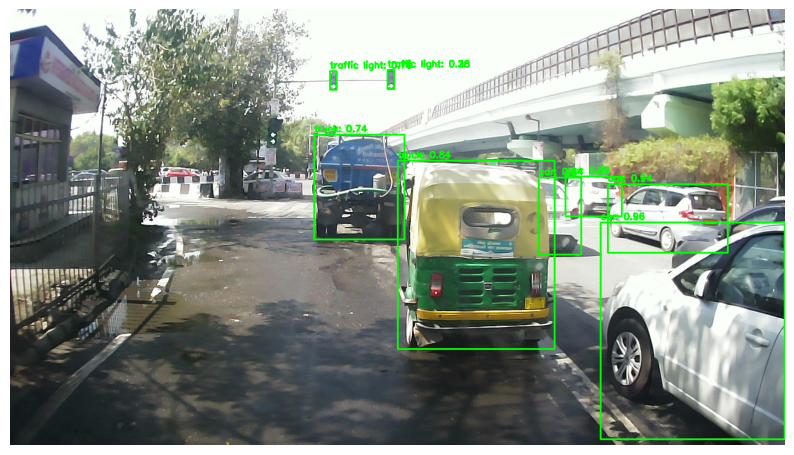

In [30]:
import matplotlib.pyplot as plt

# Load the original image
image_path = '/home/achintya-trn0175/Desktop/testfolder/24_03_05_130126-day-benchmark-f11-elp-3mm-y81i-75_0.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Assuming filtered_detections contains the filtered results as described earlier
for detection in filtered_detections:
    class_name = detection['class']
    bbox = detection['bbox']
    confidence = detection['confidence']

    # Extract bounding box coordinates
    xmin, ymin, xmax, ymax = bbox

    # Draw bounding box on the image
    cv2.rectangle(image_rgb, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
    text = f'{class_name}: {confidence:.2f}'
    cv2.putText(image_rgb, text, (int(xmin), int(ymin - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Display the image with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()